<a href="https://colab.research.google.com/github/ggug0125-ui/AI_26/blob/main/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 쇼핑몰에서는 럭키백을 판매하기로 하였다.

# 럭키팩에는 생선이 들어 있는데 종류가 7가지로 랜덤하게 들어 있다.
# 럭키팩에 확율을 표시해야 함 : 들어있는 7가지의 생선의 확률이 필요함

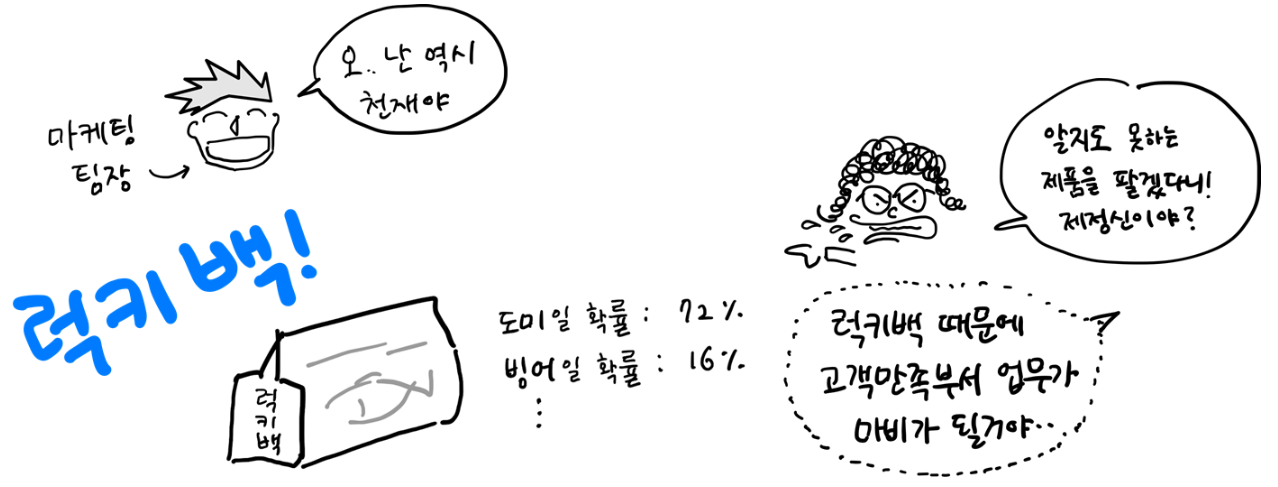

In [ ]:
# 럭키백의 확률 : 생선이 7마리라고 가정함
# 생선의 크기, 무게 (길이, 높이, 두께, 대각선의길이, 무게)

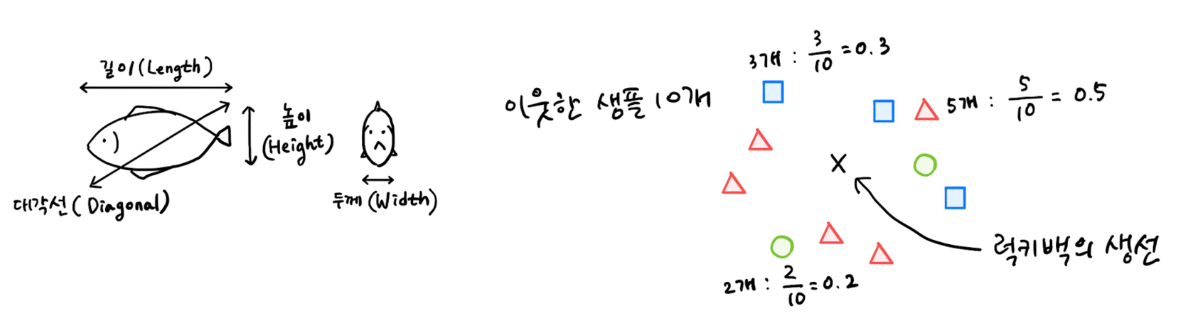

In [1]:
# k- 최근접 알고리즘을 이용해보면 회귀? 분류?
# 확률을 알고 싶은 것이기 때문에 회귀를 사용해보자~!!!

# 샘플 10개중에 농어가 3개면 ? 3 / 10 = 0.3
# 빙어가 5개면 ? 5 / 10 = 0.5
# 도미가 2개면 ? 2 / 10 = 0.2  = 100%

# 사이킷런의 K-최근접 이웃 분리기도 이와 동일한 방식으로 확율 계산도 해줌

# 샘플데이터 준비
# 로지스틱 회귀 : 럭키백 환율
import pandas as pd # 판다스로 csv를 처리함
# CSV, 엑셀 같은 데이터 파일을 읽고 다룰 때 가장 많이 사용하는 라이브러리

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일을 가져옴
fish.head() # 제일 위쪽 데이터 5개를 보여줌
# 어종(스피시즈), 무게, 길이, 대각선, 키, 너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species'])) # 유니크하게 종류를 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


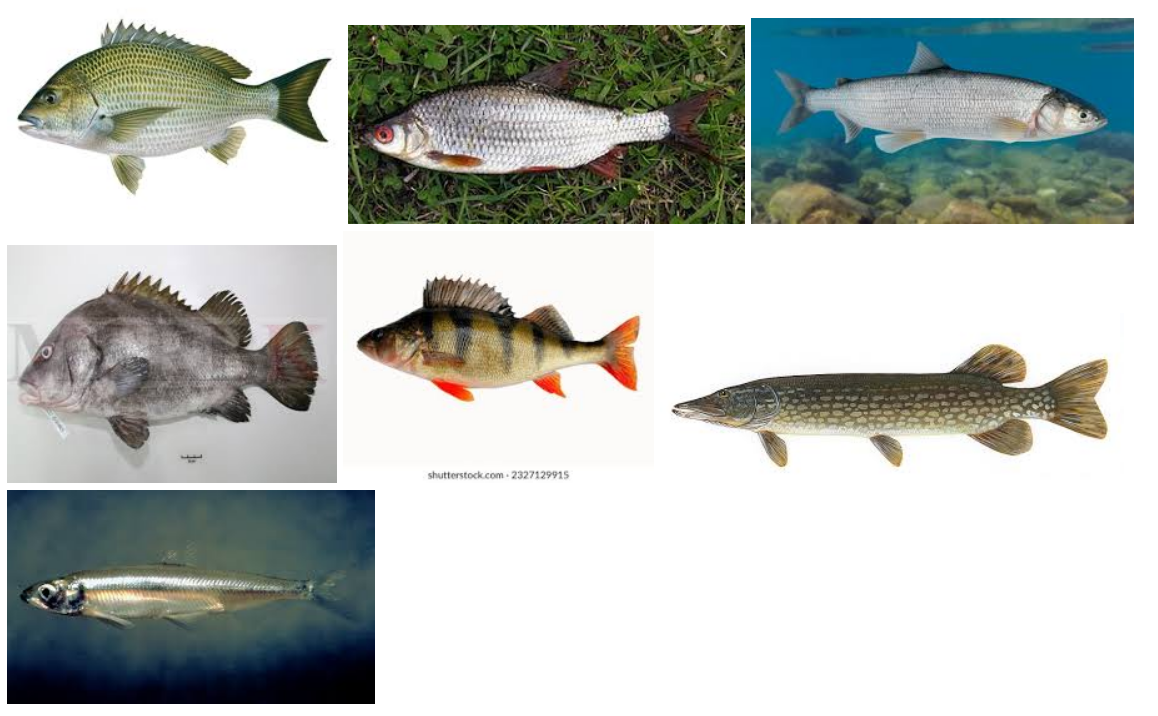

In [ ]:
# Bream : 브림(도미)
# Roach : 로치(유럽 잉어과 민물고기)
# Whitefish : 흰살송어(화이트피시)
# Parkki : 파르키 (핀란드산 붕어과 어종)
# Perch : 농어 (정확히는 유럽농어, 퍼치)
# Pike : 강꼬치고기(파이크)
# Smelt : 빙어
# 7개의 종류의 어종이 분포되어 있음

In [3]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# to_numpy()
# : pandas DataFrame을 넘파이 배열(ndarray)로 변환
# → 머신러닝 모델(sklearn)에 입력하기 쉬운 형태로 변경
# 원하는 필드를 넣어 필터링
print(fish_input[:5])  # 앞에서부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
# 정답 리스트 생성
fish_target = fish['Species']. to_numpy()
# fish[['Species]] 이렇게 하면 2차원 배열됨(금지) - >  정답파일은 1차원으로
# 'Species' 컬럼(물고기 종류)을 선택하여
# 넘파이 배열로 변환
#
# 머신러닝에서 target(정답값, y)에 해당
# 각 물고기가 어떤 종(Species)인지 저장됨

# ⚠️ fish[['Species']] 처럼 대괄호를 두 번 쓰면
# DataFrame 형태(2차원)가 되어버림 → (N,1) 구조
# 분류 모델의 target은 보통 1차원 배열(N,)이어야 하므로 사용하지 않음

print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


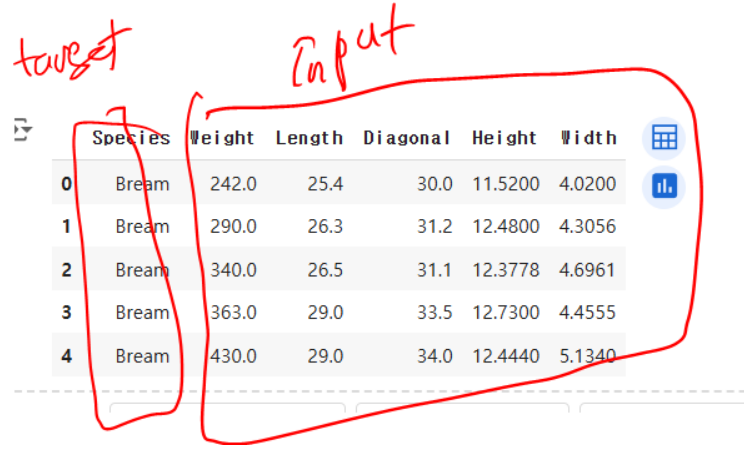

In [6]:
# 훈련세트 생성
from sklearn.model_selection import train_test_split
# 데이터를 훈련용(train)과 테스트용(test)으로 나누는 함수 불러오기

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)
# fish_input  → 입력 데이터(X) : 물고기의 여러 특징(Weight, Length, Diagonal, Height, Width)
# fish_target → 정답 데이터(y) : 물고기 종류(Species)
#
# 데이터를 무작위로 섞은 뒤 자동으로 분할:
# train_input   : 모델 학습용 입력 데이터
# test_input    : 모델 성능 평가용 입력 데이터
# train_target  : 학습용 정답(물고기 종류)
# test_target   : 테스트용 정답
#
# random_state=42
# → 데이터를 나누는 기준을 고정하여
# 실행할 때마다 동일한 결과가 나오도록 함(재현성 확보)

print(train_input.shape, test_input.shape)
# 각 데이터의 크기(행, 열) 확인
#
# (샘플수, 특성개수) 형태로 출력됨
# 예: (119, 5) (40, 5)
# → 훈련 데이터 119개, 테스트 데이터 40개
# → 특성(feature)은 5개 사용 중


(119, 5) (40, 5)


In [7]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()  # 싸이킷 런의 전처리용 (스케일 조정 : 표준점수)
# StandardScaler 객체 생성
# 표준화(Standardization) 수행:
# (값 - 평균) / 표준편차
# → 평균 0, 표준편차 1 형태로 변환

ss.fit(train_input)
# 훈련 데이터(train_input)의 평균(mean)과 표준편차(std) 계산
# ⚠️ 반드시 훈련 데이터로만 fit 해야 함 (데이터 누수 방지)

train_scaled = ss.transform(train_input)
# 훈련 데이터를 표준화
# 각 특성이 같은 기준으로 정규화됨
# → 값의 크기 차이(예: Weight vs Width)를 맞춰 모델 학습 안정화

test_scaled = ss.transform(test_input)

# 테스트 데이터도 동일한 기준(훈련 데이터 평균/표준편차)으로 변환
# ⚠️ test 데이터에는 fit() 절대 사용하지 않음

print(train_scaled[:5])


[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [10]:
# k-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier # 분류용
# K-최근접 이웃(KNN) 알고리즘
# → 주변에 가장 가까운 데이터 K개를 보고
# 다수결로 클래스를 결정하는 분류 모델

kn = KNeighborsClassifier(n_neighbors=3)
# KNN 모델 생성
# n_neighbors=3 → 가장 가까운 이웃 3개를 기준으로 분류

kn.fit(train_scaled, train_target)
# 모델은 반드시 훈련 데이터로 학습해야 함
# train_scaled  → 학습용 입력 데이터
# train_target  → 학습용 정답(물고기 종류)

print(kn.score(train_scaled, train_target)) # 훈련점수 89.07%
print(kn.score(test_scaled, test_target)) # 테스트 점수 85.00%
# 훈련, 테스트 데이터 정확도 출력

0.8907563025210085
0.85


In [11]:
print(kn.classes_)
# KNeighborsClassifier가 학습하면서 인식한
# "전체 클래스(물고기 종류) 목록"을 출력

# kn.classes_ :
# 모델이 학습 데이터(train_target)에서 발견한
# 고유한 클래스(label)들을 정렬된 상태로 저장한 속성


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))  # 이 5마리 물고기는 각각 어떤 종류인가???

# 테스트 데이터(test_scaled) 중 앞에서 5개 샘플의
# 물고기 종류(Species)를 예측

# test_scaled[:5]
# → 테스트 데이터의 처음 5개 입력값 선택
# (표준화된 Weight, Length, Diagonal, Height, Width 정보)

# kn.predict(...)
# → KNN 모델이 가장 가까운 이웃(n_neighbors=3)을 찾아
# 다수결로 물고기 종류를 결정

# 결과는 문자열 배열 형태로 반환됨
# 예:
# array(['Perch', 'Smelt', 'Bream', 'Roach', 'Pike'], dtype=object)
#
# 각 값은 해당 물고기의 예측된 Species(종 이름)

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
print(test_scaled[:5])
# 데이터의 상대적 위치(평균 기준 얼마나 떨어져 있는지) 를 나타냄
# test_scaled 값 = 실제 값이 아니라 "평균 기준 얼마나 크거나 작은지"를 나타내는 좌표

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [14]:
import numpy as np
# 넘파이 라이브러리 (배열 계산 및 출력 형식 조정에 사용)

proba = kn.predict_proba(test_scaled[:5])
# 테스트 데이터 앞 5개에 대해
# 각 클래스(물고기 종류)일 "확률"을 계산
#
# predict()는 최종 결과만 주지만,
# predict_proba()는 각 종류일 가능성을 모두 보여줌
#
# 결과 형태:
# (샘플개수, 클래스개수)
# 예: (5, 7) → 5마리 × 물고기 종류 7개


print(np.round(proba, decimals = 4))
# 소수점 4자리까지 반올림해서 출력
# 확률값을 보기 쉽게 정리
# 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch  Pike  Roach  Smelt  Whitefish' 이순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# ['Perch'  100%
#  'Smelt'  100%
#  'Pike'   100%
#  'Perch'  66.66%
#  'Perch'  66.66% ] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.


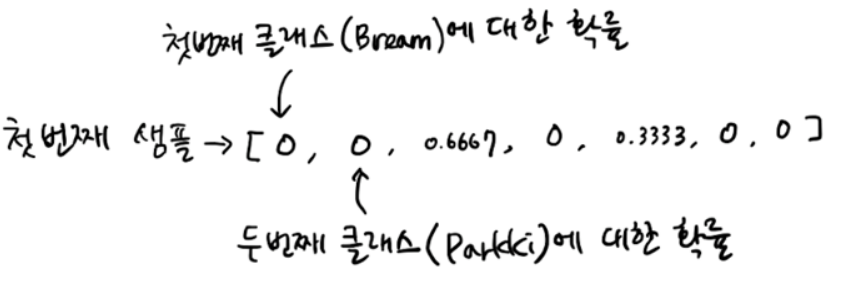

In [15]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distances, indexes = kn.kneighbors(test_scaled[3:4])
# test_scaled의 4번째 샘플(인덱스 3)에 대해
# 가장 가까운 K개의 이웃(neighbors)을 찾음
#
# kneighbors() 반환값 2개:
# distances → 각 이웃까지의 거리
# indexes   → 훈련 데이터에서 해당 이웃의 위치(인덱스 번호)

print(train_target[indexes])
# 찾은 이웃들의 실제 정답(물고기 종류)을 출력
# 즉, 이 테스트 물고기 주변에 어떤 종류의 물고기들이 있는지 확인

#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

# kneighbors는 더미데이터보다 더 높은 값이 들어올때 문제가 생긴다.


[['Roach' 'Perch' 'Perch']]


In [ ]:
# 알고리즘 변경 해보자 : 로지스틱 회귀(LogisticRegression)
# 로지스틱 회귀는 사이킷런에서 제공함 from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 이름이 회귀이지만 분류 모델임

# 선형회귀와 동일하게 선형방정식을 학습한다.
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f 는 각 항목에 대한 가중치(중요도, 계수) 임
# z는 어떤 값도 가능함 하지만 확율이 되려면 0~1 (0% ~ 100%) 사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수

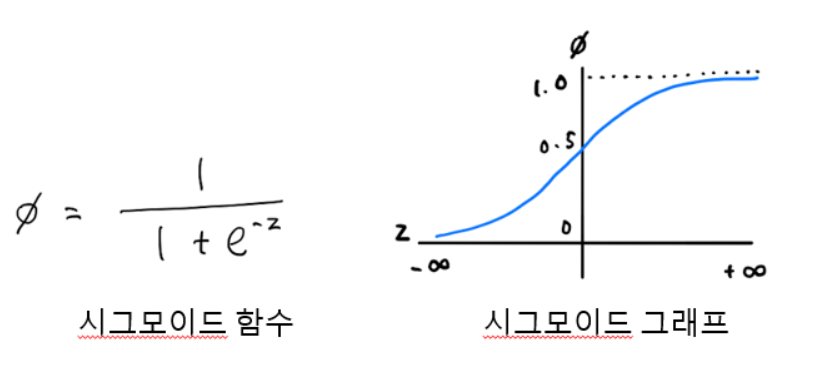

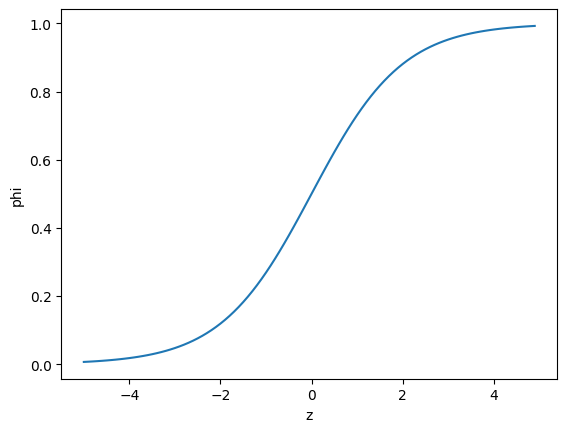

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# numpy → 수치 계산용
# matplotlib → 그래프 시각화용

# 시그모이드(Sigmoid) 함수 시각화
# z가 매우 작은 음수 → 결과는 0에 가까워짐
# z가 매우 큰 양수 → 결과는 1에 가까워짐
# 즉, 어떤 값을 "확률(0~1)" 형태로 변환하는 함수

z = np.arange(-5,5,0.1)
# -5부터 5까지 0.1 간격으로 숫자 생성
# → x축 값(입력값 z)
# → 부드러운 곡선을 그리기 위해 촘촘하게 생성

phi = 1 / (1+ np.exp(-z))
# 시그모이드 함수 공식
#
#        1
# -----------------
#   1 + e^(-z)
#
# np.exp(-z) → e의 -z 제곱 계산
# 결과(phi)는 항상 0 ~ 1 사이 값이 됨
# → 로지스틱 회귀에서 "확률"로 사용됨

plt.plot(z, phi)
# z(입력값)와 phi(출력값)를 이용해 그래프 그림
# S자 형태(S-curve)가 나타남

plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [18]:
# 선형방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
# 이렇게 하면 0~1사이 값을 0~100% 확률로 해석할 수 있다.

# 훈련전에 2진분류부터 알아 보자.
# 2진 분류인 경우에는 시그모이드 함수 출력이 0.5 보다 크면 양성, 0.5 보다 작으면 음성으로 판단
# 단. 0.5가 나오면 라이브러리마다 좀 다른데 사이킷런은 음성으로 판단함

In [19]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
# 문자열 배열 생성
print(char_arr[[True, False, True, False, False]])
# 불리언(Boolean) 인덱싱(Boolean Indexing)
# True인 위치의 값만 선택해서 출력

['A' 'C']


In [20]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)와, 빙어(Smelt)의 행만 골라내보자.

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
# train_target에서 'Bream' 이거나 'Smelt' 인 데이터만 선택하기 위한 조건 생성
#
# (train_target == 'Bream') → Bream이면 True
# (train_target == 'Smelt') → Smelt이면 True
# |  → OR(또는) 연산자
#
# 결과:
# [True, False, False, True, ...]
# 같은 Boolean 배열이 만들어짐

train_bream_smelt = train_scaled[bream_smelt_indexes]
# 위에서 만든 True/False 조건을 이용해
# 입력 데이터(train_scaled) 중 Bream 또는 Smelt에 해당하는 샘플만 추출
# → 이진 분류(Binary Classification)용 입력 데이터 생성

target_bream_smelt = train_target[bream_smelt_indexes]
# 동일한 조건으로 정답 데이터도 함께 필터링
# → 선택된 물고기들의 실제 종(label)만 남김

print(train_bream_smelt)
# 필터링된 입력 데이터 출력
# 즉, Bream과 Smelt 물고기의 특징값(스케일된 값)만 확인


# Boolean indexing으로 원하는 클래스(Bream, Smelt)만 골라서 이진 분류용 데이터셋을 만든 단계


[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [21]:
print(target_bream_smelt) # 도미이거나 빙어의 정답리스트

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [22]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀(Logistic Regression) 모델 불러오기
# 이름은 "회귀"지만 실제로는 분류(Classification) 모델
# → 확률을 계산해서 두 클래스 중 하나로 분류함

lr = LogisticRegression()
# 로지스틱 회귀 모델 객체 생성
# 기본 설정:
# - 시그모이드(sigmoid) 함수 사용
# - 확률 기반 분류 수행

lr.fit(train_bream_smelt, target_bream_smelt)
# 모델 학습
#
# train_bream_smelt → 입력 데이터(X)
#   (Bream, Smelt만 남긴 스케일된 특성값)
#
# target_bream_smelt → 정답 데이터(y)
#   ('Bream' 또는 'Smelt')
#
# 로지스틱 회귀는 내부적으로:
# 1️⃣ 입력값을 선형식으로 계산
#      z = w1x1 + w2x2 + ... + b
# 2️⃣ 시그모이드 함수 적용
#      확률 = 1 / (1 + e^-z)
# 3️⃣ 확률이 0.5 이상이면 한 클래스,
#    미만이면 다른 클래스로 분류

LogisticRegression()

In [23]:
# train_bream_smelt 처음 5개의 값으로 결론을 보자
print(lr.predict(train_bream_smelt[:5])) # 도미 4개 , 빙어 1개
# 학습된 LogisticRegression 모델로
# train_bream_smelt 데이터의 앞 5개 샘플을 분류(예측)

# train_bream_smelt[:5]
# → Bream과 Smelt만 남긴 훈련 데이터 중
# 처음 5개의 입력값 선택

# lr.predict(...)
# → 각 샘플이 'Bream'인지 'Smelt'인지 예측
# 내부적으로는:
#   1) 선형식 z 계산
#   2) 시그모이드 함수 → 확률 계산
#   3) 확률 ≥ 0.5 이면 한 클래스,
#      < 0.5 이면 다른 클래스로 결정

# 출력 예:
# array(['Bream', 'Smelt', 'Bream', 'Bream', 'Smelt'], dtype=object)
# → 각 물고기의 예측된 종류


['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
print(lr.predict_proba(train_bream_smelt[:5])) # 확률 확인(predict_proba)
# 로지스틱 회귀 모델이
# 각 샘플이 두 클래스(Bream, Smelt)일 "확률"을 출력

# train_bream_smelt[:5]
# → 훈련 데이터 중 앞 5개 샘플 선택

# predict_proba()
# → 단순히 결과(class)만 주는 predict()와 달리
# 각 클래스에 속할 확률을 함께 반환
#
# 반환 형태:
# (샘플개수, 클래스개수)
# 지금은 이진 분류이므로 (5, 2)


[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [25]:
# 샘플마다 2개의 확률이 출력된다. (시그모이드 함수)
# 첫번째 열이 0(음성)에 대한 확율, 두번째 열이 1(양성)에 대한 확율임
# 사이킷런의 타깃 값은 알파벳 순으로 정렬해서 사용함
print(lr.classes_) # Smelt(빙어)가 양성으로 사용됨
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다. (나머지는 도미로 예측함)
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면
# 전에 전처리에서 Bream인 타킷값을 1로 만들어야 함

['Bream' 'Smelt']


In [27]:
# 로지스틱 회귀로 학습한 계수(중요도:가중치)를 봐보자.
print(lr.coef_, lr.intercept_)
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형 방정식에 대입해서 결과가 나옴
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal)
#     -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [28]:
z = -0.40451732 * (train_bream_smelt[0,0]) + -0.57582787 * (train_bream_smelt[0,1]) \
 + -0.66248158 * (train_bream_smelt[0,2]) + -1.01329614 * (train_bream_smelt[0,3]) \
 + -0.73123131 * (train_bream_smelt[0,4]) + -2.16172774

# 로지스틱 회귀 모델의 "선형식(linear combination)"을 직접 계산한 것
#
# train_bream_smelt[0]
# → 첫 번째 물고기의 입력 데이터
#   [Weight, Length, Diagonal, Height, Width] (이미 스케일된 값)
#
# 각 값에 모델이 학습한 coef_(가중치)를 곱하고
# 마지막에 intercept_(절편)을 더함
#
# 즉 아래 공식 그대로 계산한 것:
#
# z = w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + b


print(z)

-6.0299135794102545


In [30]:
decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력해보자.
# 로지스틱 회귀 모델의 "선형 계산 결과(z 값)"을 구함
#
# train_bream_smelt[:5]
# → 입력 데이터 중 앞 5개 샘플 선택
#
# decision_function()
# → 시그모이드(sigmoid)를 적용하기 전 단계의 값
# → 모델 내부에서 계산되는 점수(score) 또는 logit 값
#
# 공식:
# z = w1*x1 + w2*x2 + ... + b
# (coef_와 intercept_를 이용한 선형식 결과)

print(decisions)    # 각 특성을 계산한 z 결과 값이 나옴


[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [31]:
# 이 z 값을 시그모이드 함수에 통과 시키면 확율을 얻을 수 있다.
# 파이썬의 사이파이(scipy) 라이브러리에도 시그모이드 함수가 있다. -> expit()
from scipy.special import expit
# scipy 라이브러리의 expit 함수 불러오기
# expit(x) = 시그모이드(sigmoid) 함수
# → 1 / (1 + e^(-x)) 와 동일한 함수

print(expit(decisions)) # phi = 1 / (1 + np.exp(-z))
# decision_function()에서 계산된 z값(decisions)에
# 시그모이드 함수를 적용하여 확률(phi)로 변환

# 여기까지가 2개의 물고기 분류하는 방법임
# 도미        빙어       도미       도미       도미
# [0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [32]:
# 다중분류로 진행 해보기 (2진분류는 True 아니면 모두 False 처리 됨)
# 현재 어종이 7개 임으로 로지스틱 회귀로 분류를 학습함

# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상
# LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절 하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 규제를 제어하는 매개변수가 C 로 되어있음 -> C가 작으면 규제가 커짐(기본1)
# 규제를 완화하기 위해서 20으로 늘리겠다.

lr = LogisticRegression(C=20, max_iter=1000)  # max_iter=1000 정확도를 위해서 1000번 반복
# 로지스틱 회귀 모델 생성
#
# C = 20
# → 규제(regularization) 강도의 역수
# → 값이 클수록 규제가 약해짐 (모델이 더 자유롭게 학습)
#
# 정리:
# C 작음 → 규제 강함 → 단순 모델
# C 큼   → 규제 약함 → 복잡 모델
#
# max_iter=1000
# → 최적의 계수를 찾기 위한 최대 반복 횟수
# → 데이터가 복잡할 때 수렴(convergence) 문제 방지

lr.fit(train_scaled, train_target)
# 표준화된 훈련 데이터로 모델 학습
# train_scaled  : 입력 특성(스케일 조정 완료)
# train_target  : 물고기 종류(Species)

print(lr.score(train_scaled, train_target)) # 93.27%
# 훈련 데이터 정확도(Accuracy)
# → 모델이 학습 데이터를 얼마나 잘 분류하는지

print(lr.score(test_scaled, test_target))
# 테스트 데이터 정확도
# → 처음 보는 데이터에서의 실제 분류 성능 (진짜 중요)


0.9327731092436975
0.925


In [33]:
print(lr.predict(test_scaled[:5]))  # 0~4번 인덱스 결과(분석시 다중 분류로 나옴)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [34]:
proba = lr.predict_proba(test_scaled[:5])
# 테스트 데이터 앞 5개 샘플에 대해
# 각 물고기 종류(Species)일 확률을 계산

print(np.round(proba, decimals=3))
# 확률 값을 소수점 3자리까지 반올림해서 출력
# 보기 쉽게 정리하기 위한 출력용 처리

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [35]:
print(lr.classes_)
# 로지스틱 회귀(LogisticRegression) 모델이 학습하면서
# 인식한 모든 클래스(물고기 종류) 목록을 출력

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [38]:
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) 이 데이터는 5개의 특성을 사용함, 7행을 가짐
# (7,)  7개의 행 -> 이진 분류에서 보았던 z을 7개를 계산함.
# 다중 분류는 클래스마다 z 값을 하나씩 계산 한다는 의미다.
# 당연히 가장 높은  z 값을 출력하는 클래스가 예측 클래스가 됨
# ================= 다중분류 끝 =============================


(7, 5) (7,)


In [37]:
# 그럼 확률은 ? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환 했었다.
# 그러나 다중 분류에서 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum ->  s1 ~ s7 까지 모두 더하면 분모가 같아져 1이 됨

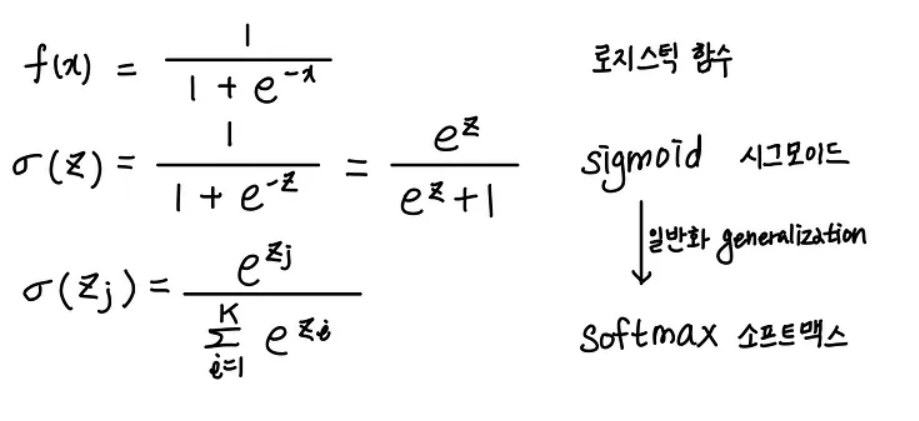

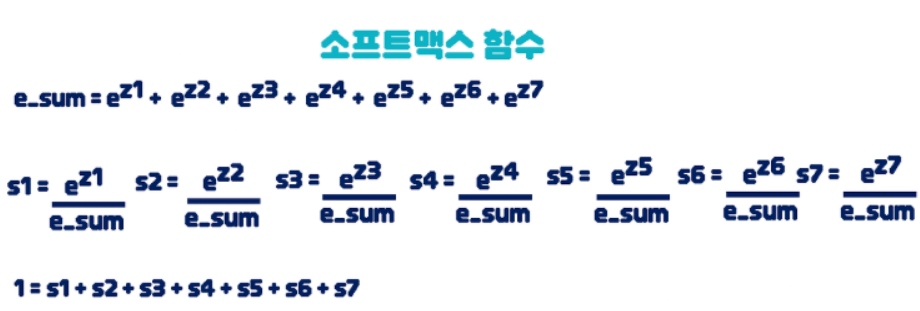

In [40]:
decision = lr.decision_function(test_scaled[:5])
# 테스트 데이터 앞 5개 샘플에 대해
# 로지스틱 회귀의 "선형 계산 결과(z 값)"을 구함
#
# 다중 분류(LogisticRegression)에서는
# 클래스마다 하나씩 z 값이 존재함
# → 물고기 종류가 7개라면 z도 7개씩 생성됨

print("5개 샘플에 대한 z1 ~ z7의 값\n")

for idx,z in enumerate(decision): # 선형방정식를 이용한 7개의 특성의 값
    # enumerate()
    # → (인덱스번호, 값)을 함께 가져오는 반복문
    # idx : 샘플 번호
    # z   : 해당 샘플의 모든 클래스에 대한 z 값 배열

    print(f"{idx}번째 샘플의 z값\n{z}\n")
    # 각 샘플마다 계산된 z 값 출력
    #
    # z 값 의미:
    # 각 클래스별 "점수(score)" 또는 "로짓(logit)"
    #
    # 예:
    # [z_Bream, z_Parkki, z_Perch, z_Pike, z_Roach, z_Smelt, z_Whitefish]

5개 샘플에 대한 z1 ~ z7의 값

0번째 샘플의 z값
[-6.50722813  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625858
 -0.62549703]

1번째 샘플의 z값
[-10.87900747   1.9441061    4.77600606  -2.42306183   2.98748716
   7.84171376  -4.24724379]

2번째 샘플의 z값
[-4.33809957 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431897
 -3.87182372]

3번째 샘플의 z값
[-0.69143993  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143405
  1.25700485]

4번째 샘플의 z값
[-6.40138611 -1.99137623  5.81526372 -0.134644    3.49905133 -0.08753486
 -0.69937385]



In [41]:
from scipy.special import softmax           # 소프트맥스를 사용하여 7개를 100%로 분류
# softmax 함수 불러오기
# 여러 개의 z값(각 클래스 점수)을 확률로 변환하는 함수
# → 모든 클래스 확률의 합이 100%(=1)가 되도록 변환

print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
# 모델이 학습한 클래스 이름(lr.classes_)을 리스트로 변환
# 마지막에 "예측 결과" 컬럼을 추가해서
# 확률 + 최종 예측을 함께 출력하기 위함

prd = lr.predict(test_scaled[:5]).reshape(5,-1)
# 앞 5개 테스트 데이터의 최종 예측 클래스
# reshape(5,-1) → 열(column) 형태로 바꿔
# 확률 데이터와 나란히 붙일 준비

sm = softmax(decision, axis=1).round(4) * 100
# decision_function에서 구한 z값(decision)에 softmax 적용
#
# axis=1 :
# → 각 샘플(row)마다 softmax 계산
# → 한 행의 확률 합 = 1 (여기서는 ×100 해서 100%)
#
# round(4) :
# → 소수점 4자리까지 반올림
#
# *100 :
# → 확률을 % 단위로 보기 쉽게 변환
con = np.column_stack((sm,prd))
# 확률 배열(sm)과 예측 결과(prd)를 옆으로 합침
# → [각 클래스 확률 | 최종 예측 클래스]

print(pd.DataFrame(con,columns=class_))
# 결과를 pandas DataFrame 형태로 출력
# → 표 형태로 각 클래스 확률과 예측 결과를 한눈에 확인

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki  Perch   Pike  Roach  Smelt Whitefish  예측 결과
0   0.0   1.36   84.2   0.03  13.48   0.68      0.26  Perch
1   0.0   0.26   4.41    0.0   0.74  94.59       0.0  Smelt
2   0.0    0.0    3.4  93.44   1.52   1.63       0.0   Pike
3  1.09    3.4  30.54   0.65  56.68   0.01      7.64  Roach
4   0.0   0.04  90.43   0.24   8.92   0.25      0.13  Perch
